# **Bioinformatics Project - Computational Drug Discovery [Part 4] Regression Models with Random Forest**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 4**, we will be building a regression model of acetylcholinesterase inhibitors using the random forest algorithm.

---

## **1. Import libraries**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [2]:
! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

zsh:1: command not found: wget


In [3]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

## **3. Input features**
The ***Acetylcholinesterase*** data set contains 881 input features and 1 output variable (pIC50 values).

In [4]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3544,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3545,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3546,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3547,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
Y = df.pIC50
Y

0       5.737549
1       3.947999
2       4.425969
3       5.346787
4       5.735182
          ...   
3544         NaN
3545         NaN
3546         NaN
3547         NaN
3548         NaN
Name: pIC50, Length: 3549, dtype: float64

In [6]:
import numpy as np

# Make sure Y is numeric (sometimes it's an object array)
Y = np.asarray(Y, dtype=float)

# Keep only rows where Y is NOT NaN
mask = ~np.isnan(Y)

X = X[mask]
Y = Y[mask]

print("NaNs left in Y:", np.isnan(Y).sum())
print("X shape:", X.shape, "Y shape:", Y.shape)


NaNs left in Y: 0
X shape: (18, 881) Y shape: (18,)


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)


RandomForestRegressor()

In [8]:
print("NaNs in Y:", np.isnan(Y).sum())
print("X shape:", X.shape)
print("Y shape:", Y.shape)


NaNs in Y: 0
X shape: (18, 881)
Y shape: (18,)


### **3.1. Input features**

### **3.2. Output features**

### **3.3. Let's examine the data dimension**

In [9]:
X.shape

(18, 881)

In [10]:
Y.shape

(18,)

### **3.4. Remove low variance features**

In [11]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [12]:
X.shape

(18, 74)

## **4. Data split (80/20 ratio)**

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [14]:
X_train.shape, Y_train.shape

((14, 74), (14,))

In [15]:
X_test.shape, Y_test.shape

((4, 74), (4,))

## **5. Building a Regression Model using Random Forest**

In [16]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

-0.1718030975142808

In [17]:
Y_pred = model.predict(X_test)

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

<function matplotlib.pyplot.show(close=None, block=None)>

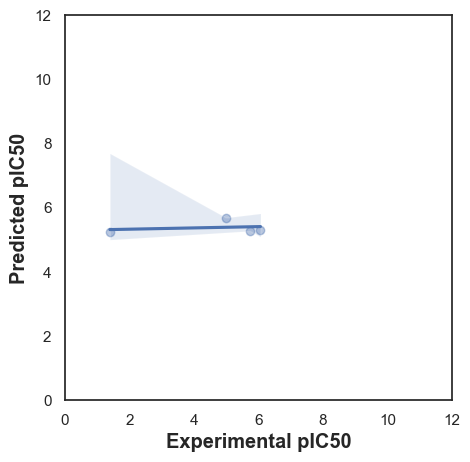

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show